# General overview of the game we play in machine learning.
- Nature generates data according to some function $f:x \rightarrow y$ we don't know
- In machine learning we want a good approximation of f on out of sample data.
- We start with set of possible functions(Hypothesis space $\mathcal{H}$) and try to pick a function $\hat{f}$ best approximating true f(which we don't know)
    + Complex $\mathcal{H} $ means  good chance of approximating $f$ but hard to find approximation?
    + Simple $\mathcal{H}$ means good generalization on out of sample data.

Bias variance analysis effectively asks following questions.
- How well $\mathcal{H}$ can approximate $f$ overall.
- Given the sample how good is our approximation.


Let's use square error analysis on linear regression
Let's say f is true function and $\hat(f)$ is our choice of target function based on sample dataset $\mathcal{D}$  in hypothesis space $\mathcal{H}$
Then

  $E_{out}(\hat{f}_{\mathcal{D}}) = \mathbb{E}_{x}(\hat{f}_{\mathcal{D}}(x) -f(x))^2$
 
 This depends on a particular sample $\mathcal{D}$. If we take another same number of sample this will change.
 To do error anlysis we need to get rid of a particular sample $\mathcal{D}$ choice.
 
 Let's take expectation with respect to distriution of over $\mathcal{D}$

 $\begin{align} \mathbb{E_{\mathcal{D}}}(E_{out}(\hat{f}_{\mathcal{D}})) &=  \mathbb{E_{\mathcal{D}}}\mathbb{E}_{x}(\hat{f}_{\mathcal{D}}(x) -f(x))^2 \\
 & = \mathbb{E}_{x}\mathbb{E}_{\mathcal{D}}(\hat{f}_{\mathcal{D}}(x) -f(x))^2  \end{align}$

Define average hypothesis

$$ \bar{f} = \mathbb{E}_{\mathcal{D}}(\hat{f}_{\mathcal{D}}(x))$$

$\begin{align}  \mathbb{E}_{\mathcal{D}}(\hat{f}_{\mathcal{D}}(x) -f(x))^2  
 & = \mathbb{E}_{\mathcal{D}}[\hat{f}_{\mathcal{D}}(x) -\bar{f}(x) +\bar{f}(x)  -f(x)]^2 \\
 &= \mathbb{E}_{\mathcal{D}} [ (\hat{f}_{\mathcal{D}}(x) -\bar{f}(x))^2 + (\bar{f}(x)  -f(x))^2) +2(\hat{f}_{\mathcal{D}}(x) -\bar{f}(x)) (\bar{f}(x)  -f(x))]\\
 &= \mathbb{E}_{\mathcal{D}} [ (\hat{f}_{\mathcal{D}}(x) -\bar{f}(x))^2] + [\bar{f}(x)  -f(x)]^2 
 \end{align}$

$\underbrace{\mathbb{E}_{\mathcal{D}} [ (\hat{f}_{\mathcal{D}}(x)}_\text{variance(x)} -\bar{f}(x))^2] + \underbrace{[\bar{f}(x)  -f(x)]^2}_\text{bias(x)} $

bias =  a measure of best we can do in our hypothesis set

variance = how far our hypothesis based on $\mathcal{D}$ is away from average

$\begin{align} \mathbb{E}_{x}\mathbb{E}_{\mathcal{D}}(\hat{f}_{\mathcal{D}}(x) -f(x))^2 
&= \mathbb{E}_x[\mathbb{E}_{\mathcal{D}} [ (\hat{f}_{\mathcal{D}}(x) -\bar{f}(x))^2] + [\bar{f}(x)  -f(x)]^2]\\
&= \mathbb{E}_x[ bias^2(x) + variance(x)] \\
&= bias^2 + variance
\end{align}$

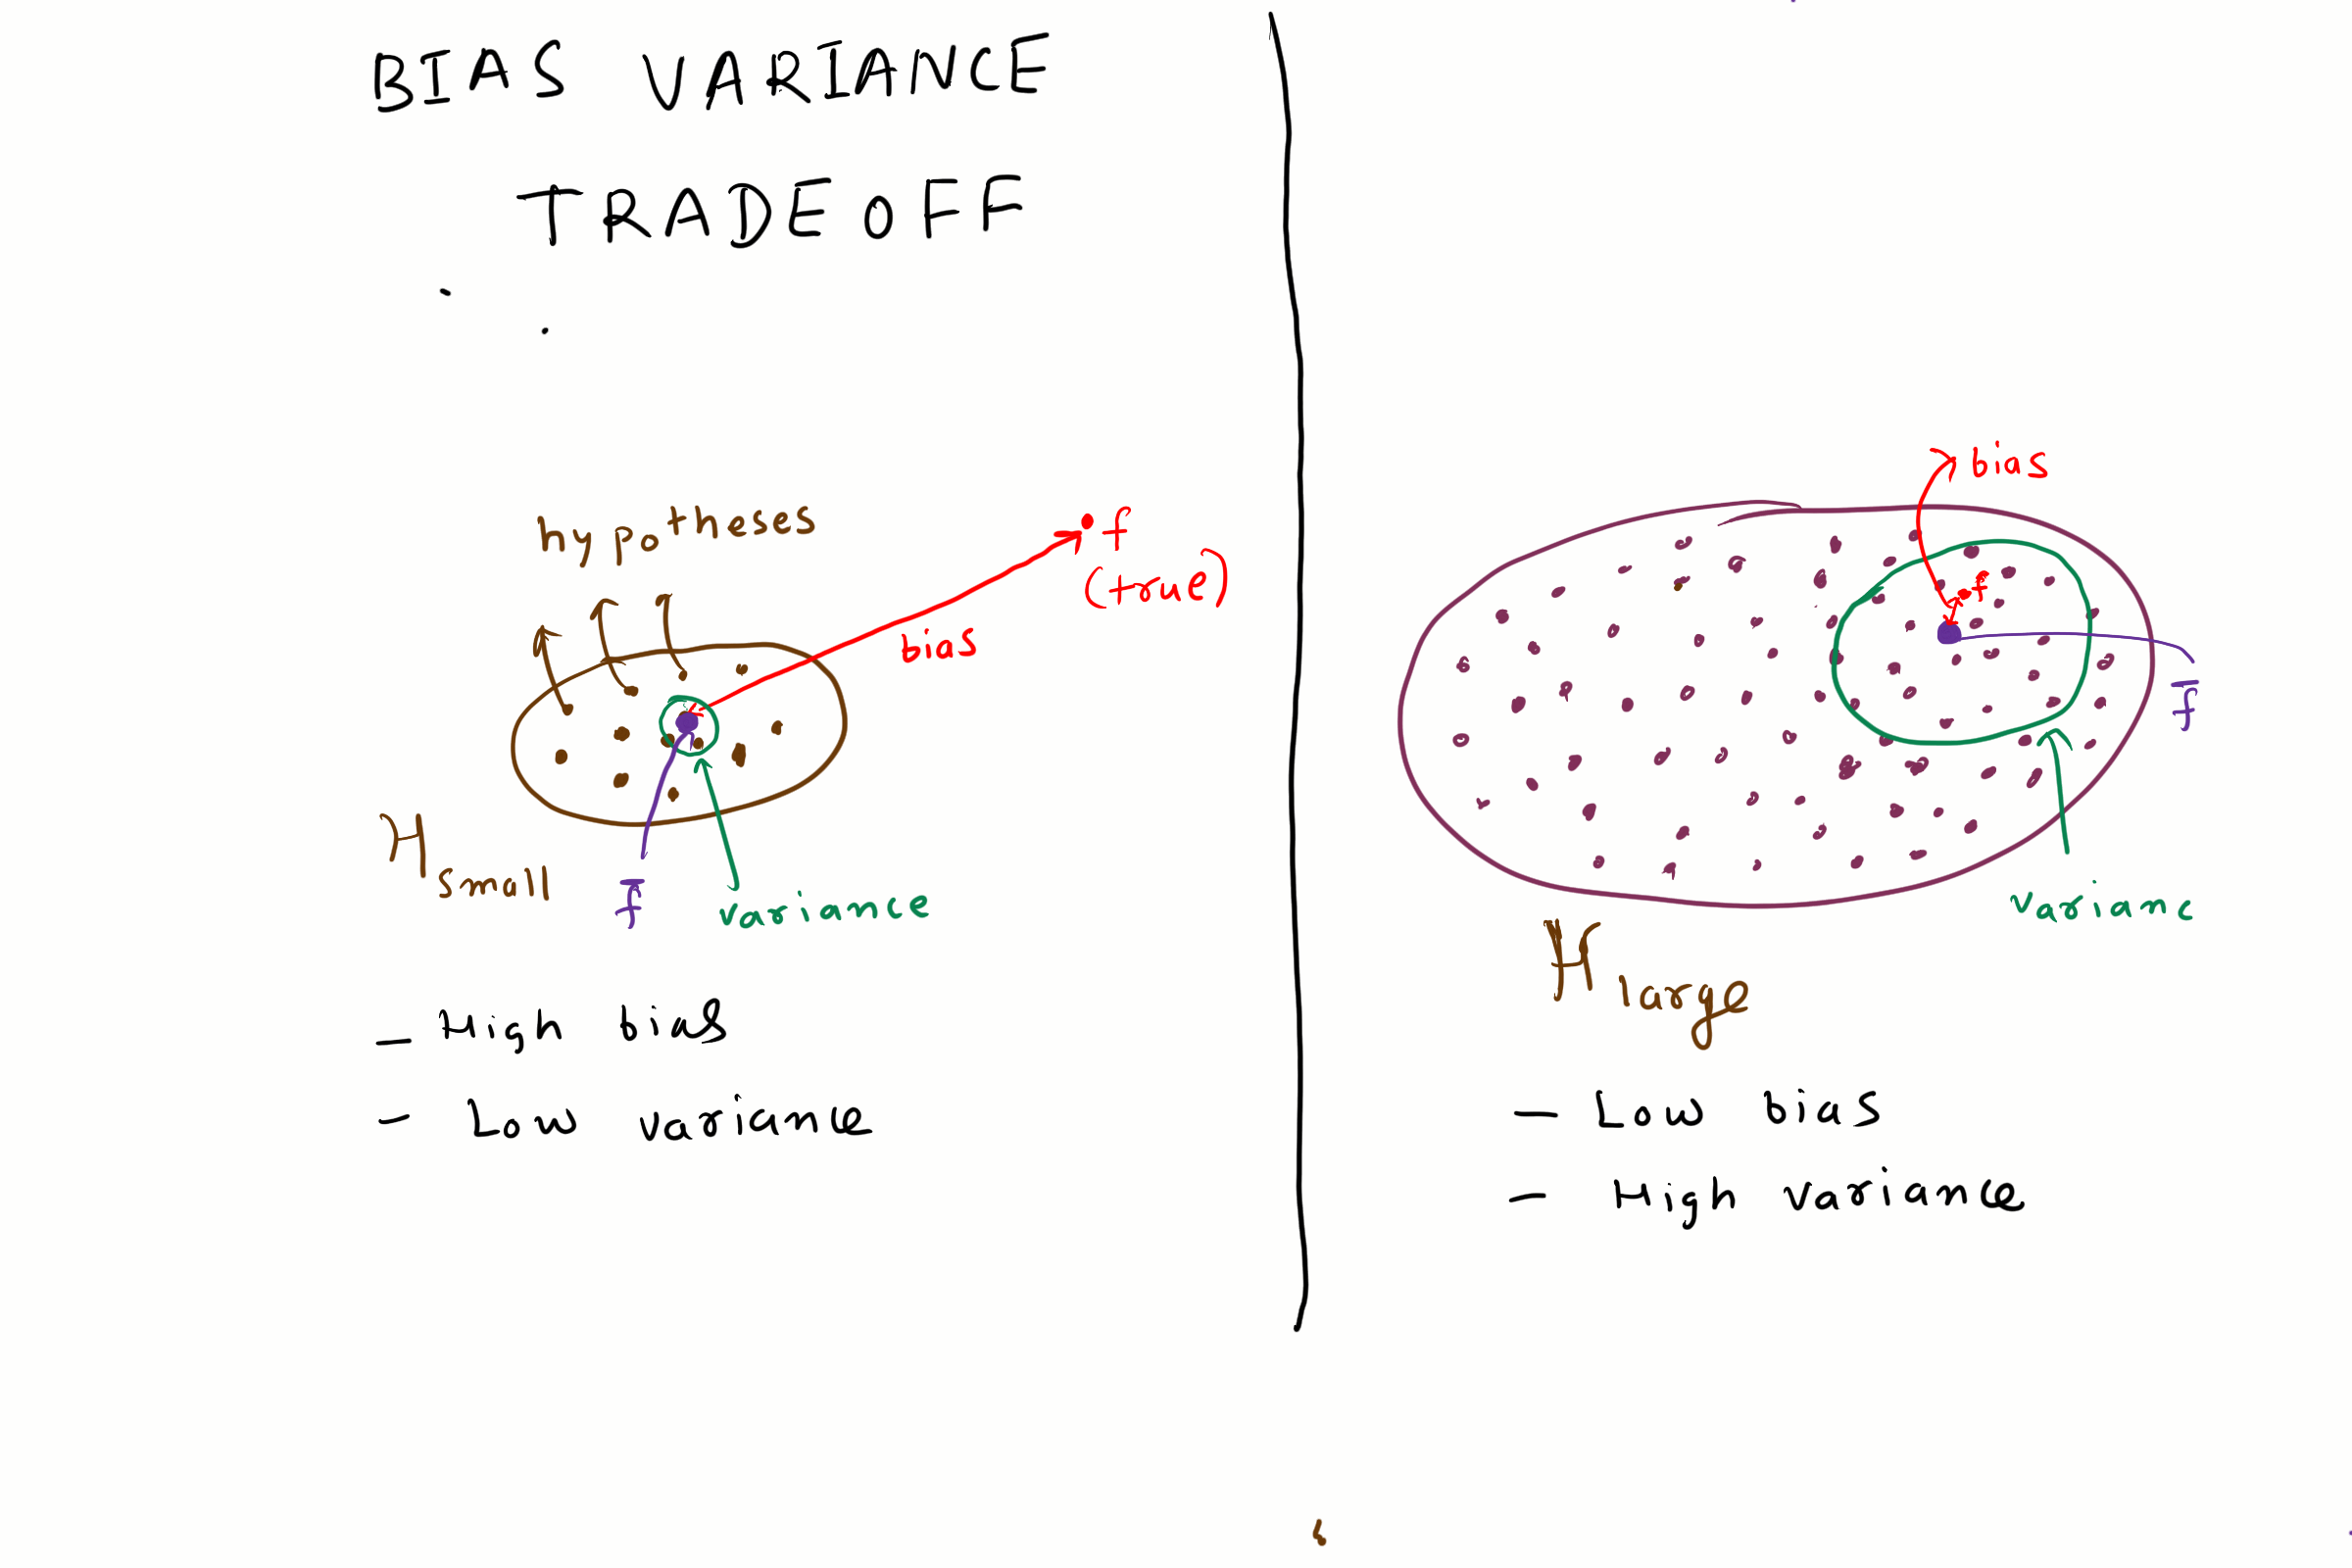

<img src="bias_variance_c.jpeg" alt="train val test" width="1000" height="1000">

<img src="under_over.jpeg" alt="train val test" width="1000" height="1000">

# Evaluation of Learning algorithms

We need a way to measure how well learning algorithm perfroms.
Till now we have seen follwoing measures

- Accuracy
- Precision, Recall, ROC curve

# let's make it more formal
- Given an Hypothesis space $\mathcal{H}$, using training data $\mathcal{D}$ we select a hypothesis $\hat{f} \in \mathcal{H}$
- Given a feature vector $x$ we  predict using $h$ as $\hat{y} =\hat{f}(x)$. Let say true value is $y.$


## For Regresssion 

- MAE (Mean absolute error)  $  \frac{\sum_i^N|\hat{f}(x_i) -y_i|}{N}$
- MSE (Mean square error)  $\frac{\sum_i^N\|\hat{f}(x_i) -y_i\|^2}{N}$
## For Classification
 - Miss classification error =    $\frac{\sum_i^N\mathbb{I}(\hat{f}(x_i) \ne y_i)}{N}$
 - Build Confusion matrix, Remember TP, TN, FP, FN for binary calssification. You can build confusion matrix 
 for K class classification too.
 - ROC

# Confusion Matrix for a particular value of threshold $\tau$
|       | $y=1$           | $y=0$  |     |
| ------------- |:-------------:| -----:|:---|
| $\hat{y}$=1      | TP |FP | $\hat{N}_{+}$ = TP + FN   |    |
| $\hat{y}$=0      | FN      |   TN |     $\hat{N}_{-}$ = TN + FN|
|------------- |:-------------:| -----:|:-----|
|    | $N_{+}$ = TP + FN    |  $N_{-}$ = TN + FP   | N= TP+FN +TN+FP    |

precision = $\frac{TP}{TP+FP}$

recall = True positive rate(**TPR**) = $\frac{TP}{N_+} \approx p(\hat{y} =1| y =1)$

false positive rate (**FPR**)(type I error rate) = $\frac{FP}{N_{-}} \approx p(\hat{y} =1| y =0)$ 

## Sample error vs True Error(In classification setting)
**Sample error** : The sample error of a  hypothesis $\hat{f}(x)$  with respect to true function(target) $f$
on a sample $\mathcal{D} = \{x_i, y_i = f(x_i) \}_{i=1}^{i=N}$  is miss classification error  $\frac{\sum_i^N\mathbb{I}(\hat{f}(x_i) \ne f(x_i))}{N}$

**True Error** The true error of a  hypothesis $\hat{f}(x)$  with respect to true function(target) $f$
 and distribution $P$, is the probability of mis classifying a random sample from distrubtion $P$, $Pr_{x \sim P} [\hat{f}(x) \ne f(x)]$
 
 We need good  **True Error**

# Evaluation of hypothesis under limited sample data

- Split the samples into train and test
<img src="train_val_test.jpeg" alt="train val test" width="1000" height="1000">

What if train set is too small

- we have small samples size.
- Can't touch test set
- Can we use data in validation for training too?

yes. Procedure is calls k -fold cross validation

<img src="kfold.jpeg" alt="train val test" width="1000" height="1000">